****Bike Network Data Collection****

This notebook is to be run at the start of the analysis process to access and download bicycle infrastucture from OpenStreetMap. This is completed using GeoPandas and the OSMNx packages. 

Any location with a boundary can be input from OpenStreetMap, such as a city, county, region or country (not recommended!). Filters of path/street type should be edited according to the usecase. Collected network features are displayed on a map at the end of this notebook.

In [1]:
# libary imports
import geopandas as gpd
import osmnx as ox
import folium
import os
import networkx as nx

# Configuring osmnx
useful_tags = ox.settings.useful_tags_way + ['cycleway'] + ['bicycle']
ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)

# get working directory
working_directory =  os.getcwd()

c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [2]:
# input location
place = "City of Chester, United Kingdom"

# show map

map = False # use True or False 

# run analysis scripts

run_scripts = True # True or False

# Here are some nice small cities to try

# City of Chester, United Kingdom
# Roosendaal, Netherlands
# Albertville, France
# Columbus, Nebraska, USA


# store choosen place for future scripts
%store place


Stored 'place' (str)


In [3]:
# get networks and boundary

road_network = ox.graph_from_place(place, network_type= 'drive', simplify=True)

bikeable_network = ox.graph_from_place(place, network_type= 'all', simplify=True) # we use the 'all' tag to ensure paths where walking and cycling allowed are accessed

boundary = ox.geocode_to_gdf(place)


In [4]:
# split into nodes and edges
bike_network_edges = ox.utils_graph.graph_to_gdfs(bikeable_network, nodes=False, edges=True)
bike_network_nodes = ox.utils_graph.graph_to_gdfs(bikeable_network, nodes=True, edges=False)

In [5]:
# keep on the street edge types that show 'proper' bike infrastructure

if 'cycleway' in bike_network_edges.columns:
    bike_network_edges = bike_network_edges[(bike_network_edges.highway == 'cycleway') 
                | (bike_network_edges.highway == 'bridleway') # this tag may need removing
                | (bike_network_edges.cycleway == 'crossing')
                | (bike_network_edges.cycleway == 'track')
                | (bike_network_edges.cycleway == 'separate')
                | (bike_network_edges.cycleway == 'oppesite_track') # this tag may need removing
                | ((bike_network_edges.bicycle == 'yes') & (bike_network_edges.highway== 'footway')) # this tag may need removing
                | (bike_network_edges.bicycle == 'designated') # this tag may need removing 
                | (bike_network_edges.bicycle == 'permissive') # this tag may need removing
                ]

# Places in the USA often lack the 'cycleway' and 'bicycle' tags

else:
    bike_network_edges = bike_network_edges[(bike_network_edges.highway == 'cycleway') 
                | (bike_network_edges.highway == 'bridleway') # this tag may need removing
                ]


In [6]:
# join nodes and edges back into a network

bike_network =  ox.utils_graph.graph_from_gdfs(bike_network_nodes, bike_network_edges) 

# remove isolated node

bike_network = ox.utils_graph.remove_isolated_nodes(bike_network)

In [7]:
# set up map
m = ox.folium.plot_graph_folium(road_network, popup_attribute = 'highway' , zoom = 1, fit_bounds= True, weight = 0.5, opacity = 0.5)
folium.features.Choropleth(boundary, fill_color = '#03E7FF', fill_opacity = 0.04, line_color='#50DBEA', line_opacity=0.6 ).add_to(m)
m = ox.folium.plot_graph_folium(bike_network, graph_map = m, popup_attribute = 'highway' , zoom = 1, fit_bounds= True,color = 'red', weight= 1)

def show_map(map):
    if map == True:
        print("Plotting...")
        return m

# plot map
show_map(map)

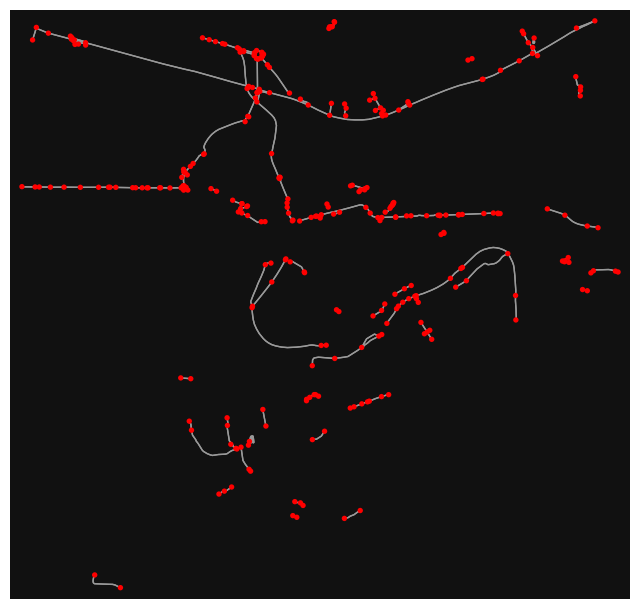

In [8]:
# plot bike network with nodes 

fig, ax = ox.plot_graph(bike_network, node_color="r")

In [9]:
# save networks and boundary for future analysis

ox.io.save_graphml(bike_network, filepath=working_directory + "\Data\\bike_network.xml") 

ox.io.save_graphml(road_network, filepath=working_directory + "\Data\\road_network.xml") 

boundary.to_file(working_directory + '\Data\\boundary.gpkg')

c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


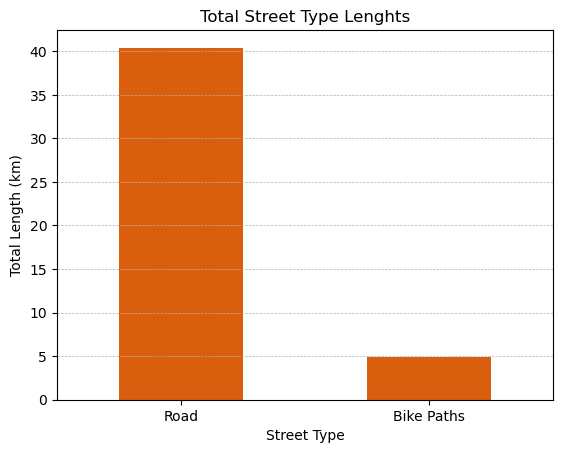

The ratio of road network ( 40.405622300000005 km) to bike network ( 4.9517728 km) is 1 : 8.159829606883418.
9.087654425501913
Bike network entropy is:  3.4450481853560055


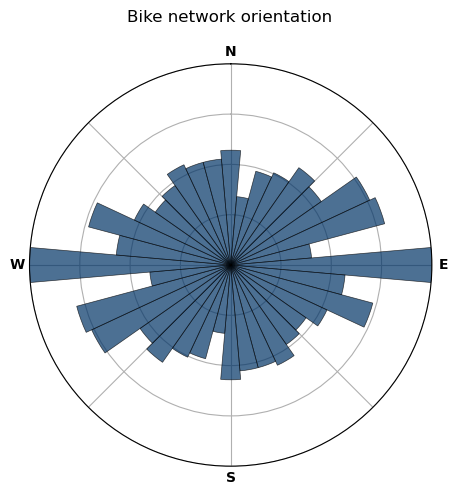

Road network entropy is:  3.5547782598863074


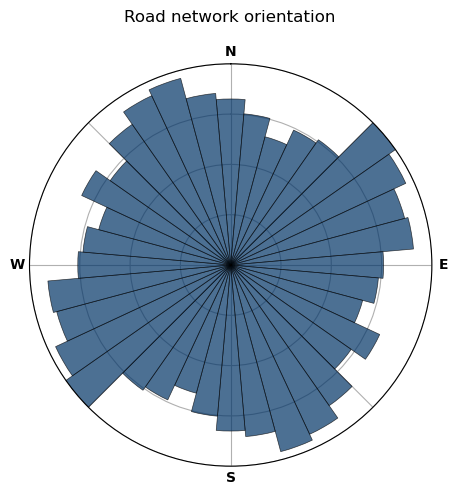

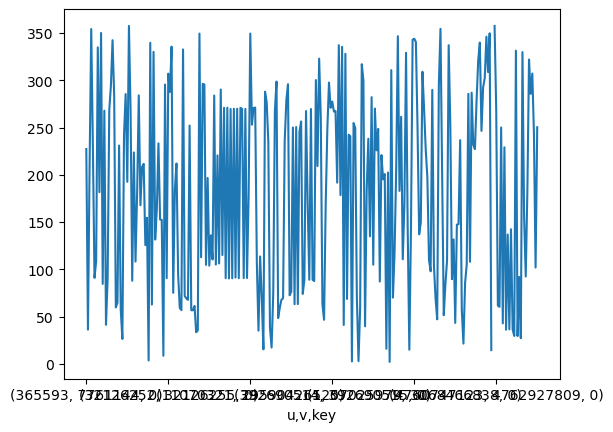

c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\momepy\shape.py:1252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  self.series = euclidean / gdf.geometry.length
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\momepy\shape.py:1252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  self.series = euclidean / gdf.geometry.length


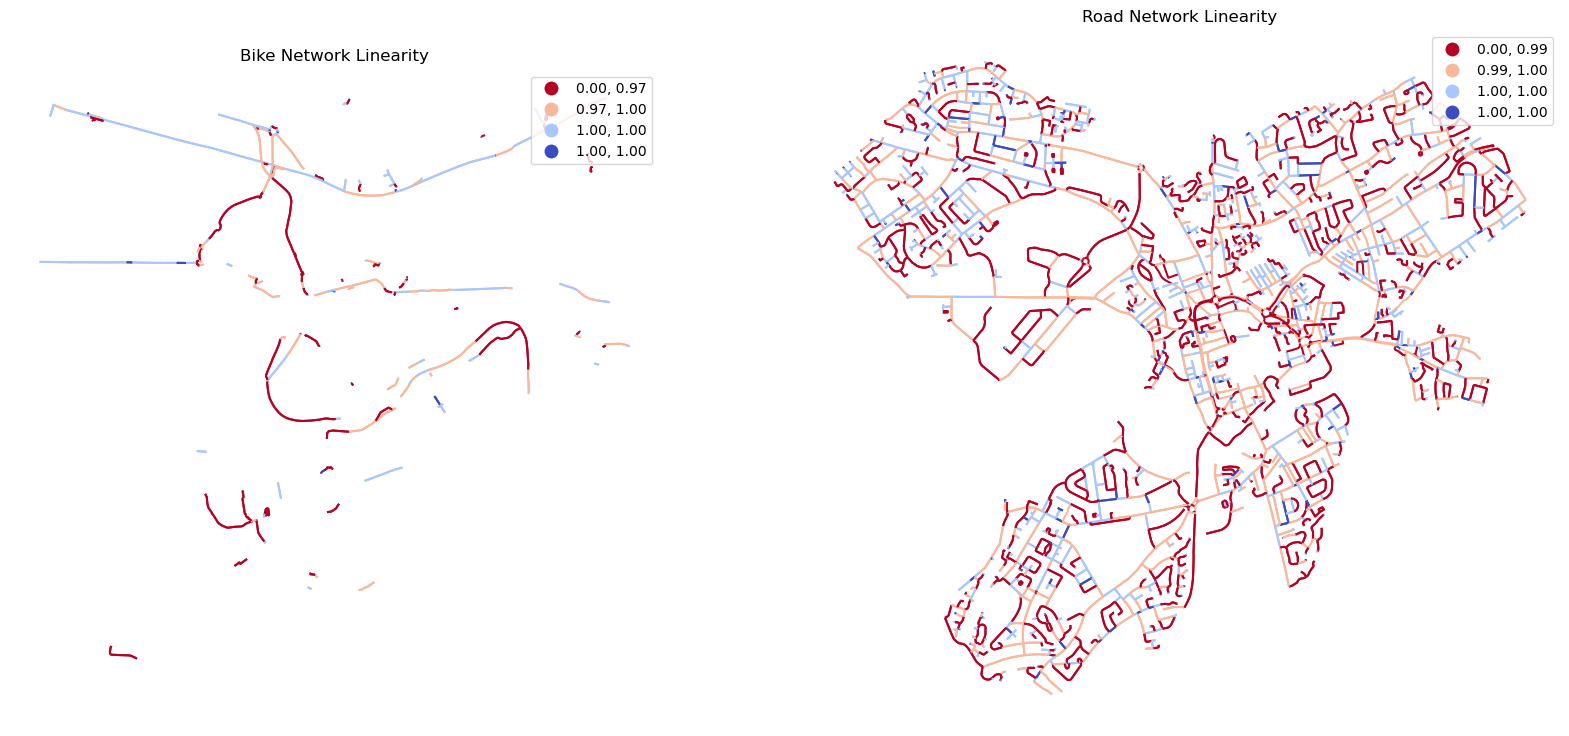

c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\momepy\utils.py:235: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\momepy\utils.py:235: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


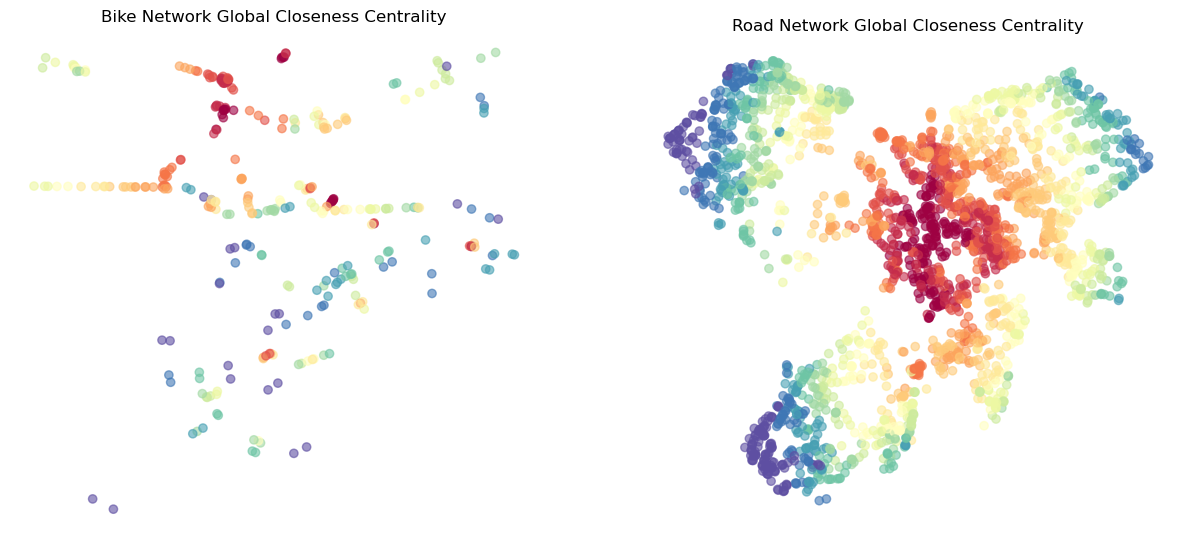

c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 1
  Warn("Warning: setting k to %d" % k_q, UserWarning)
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


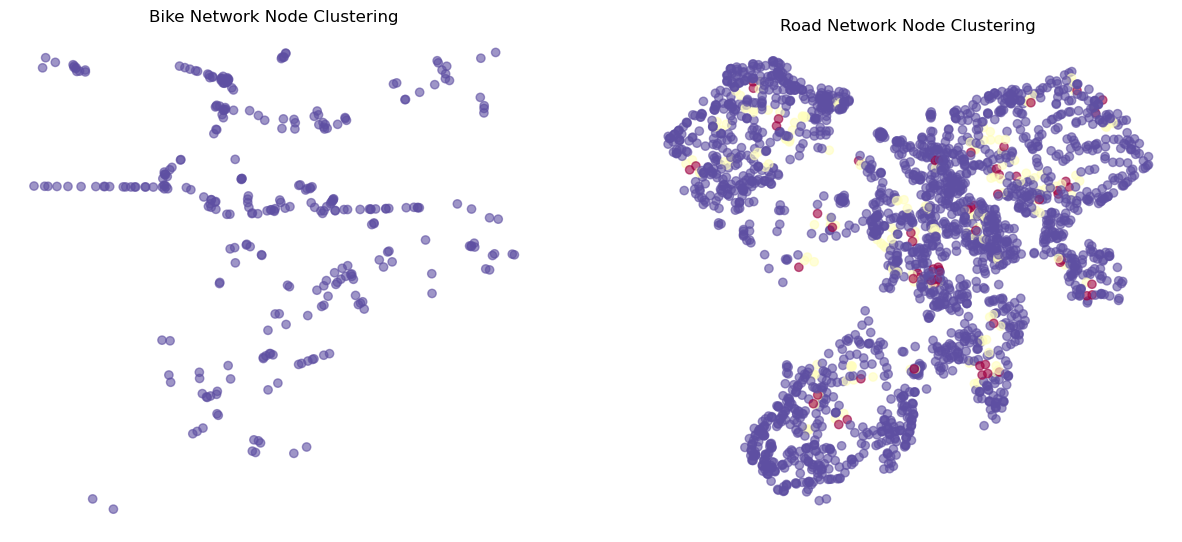

c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 11
  Warn("Warning: setting k to %d" % k_q, UserWarning)


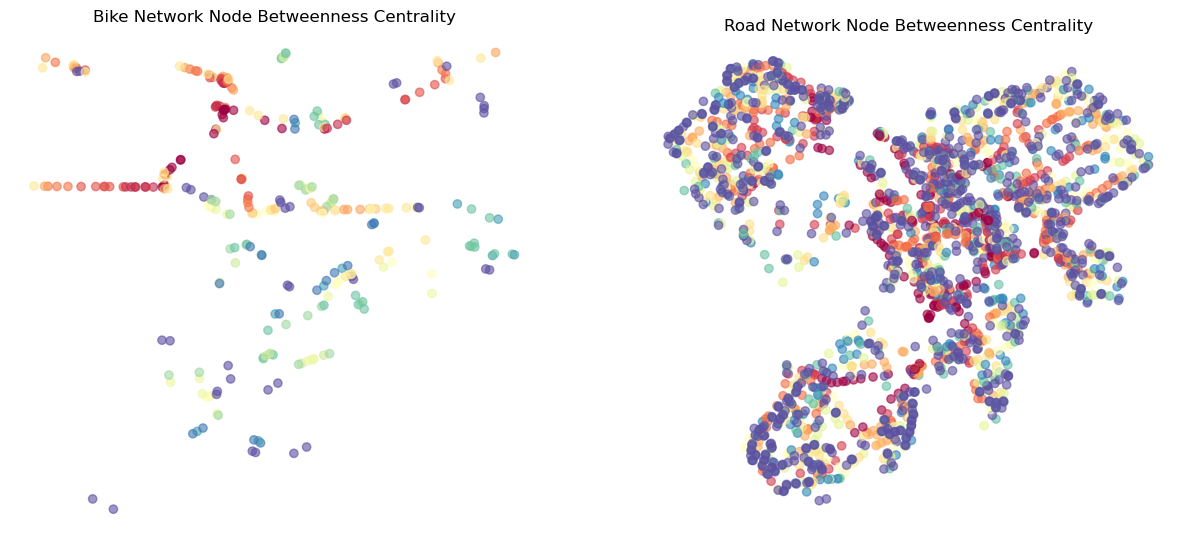

c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 12
  Warn("Warning: setting k to %d" % k_q, UserWarning)


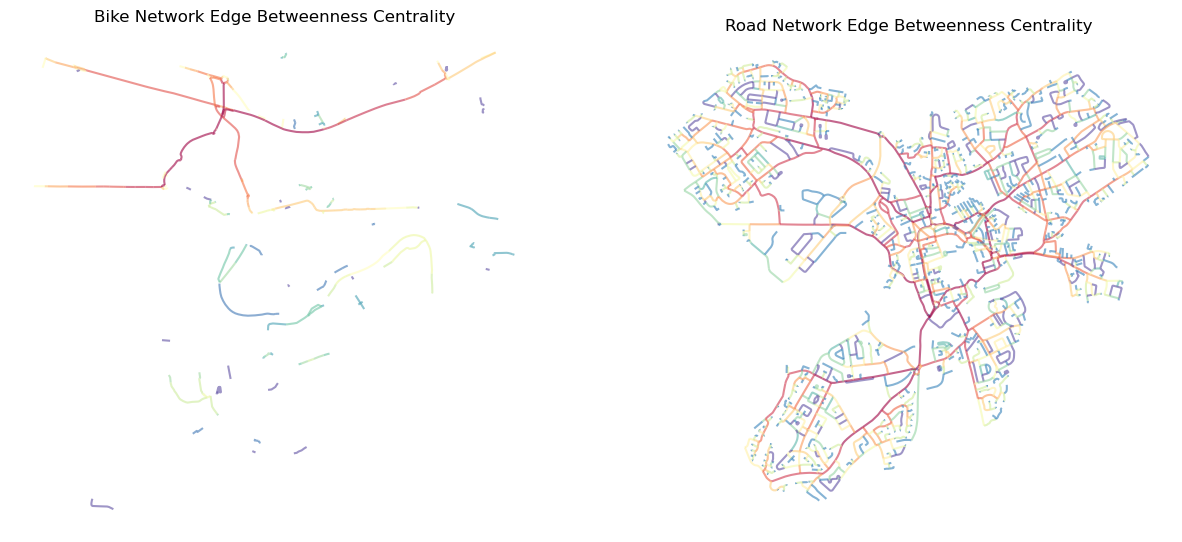

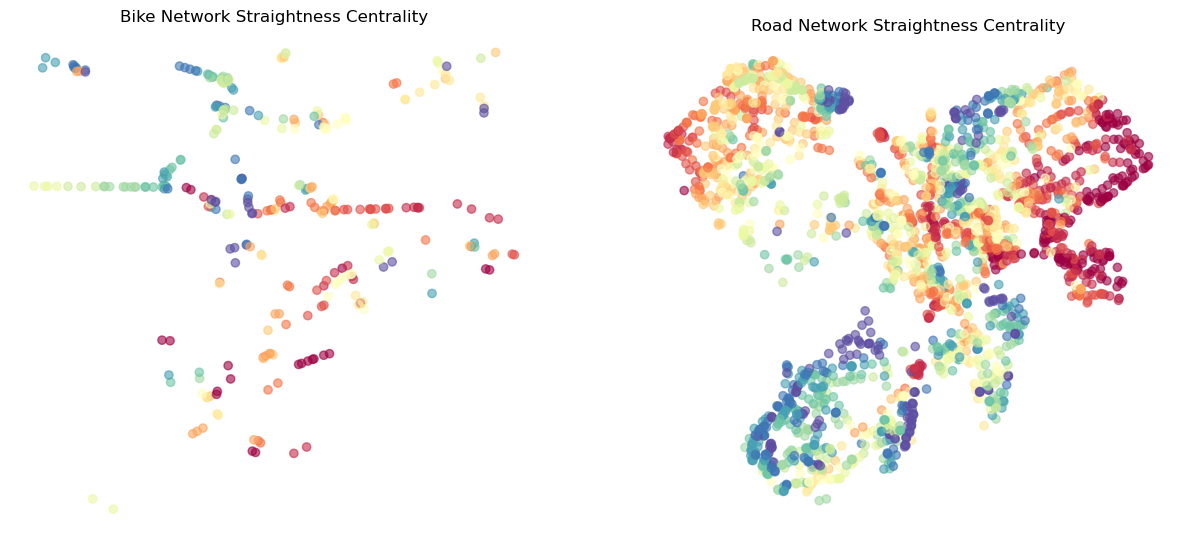

c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 13
  Warn("Warning: setting k to %d" % k_q, UserWarning)
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 1
  Warn("Warning: setting k to %d" % k_q, UserWarning)
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\mapclassify\classifiers.p

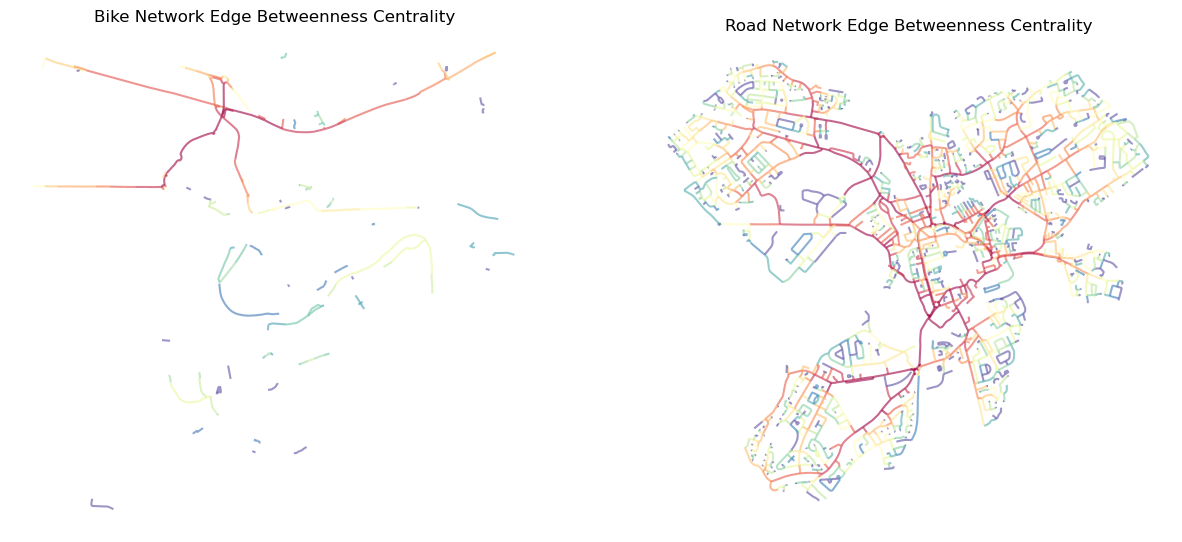

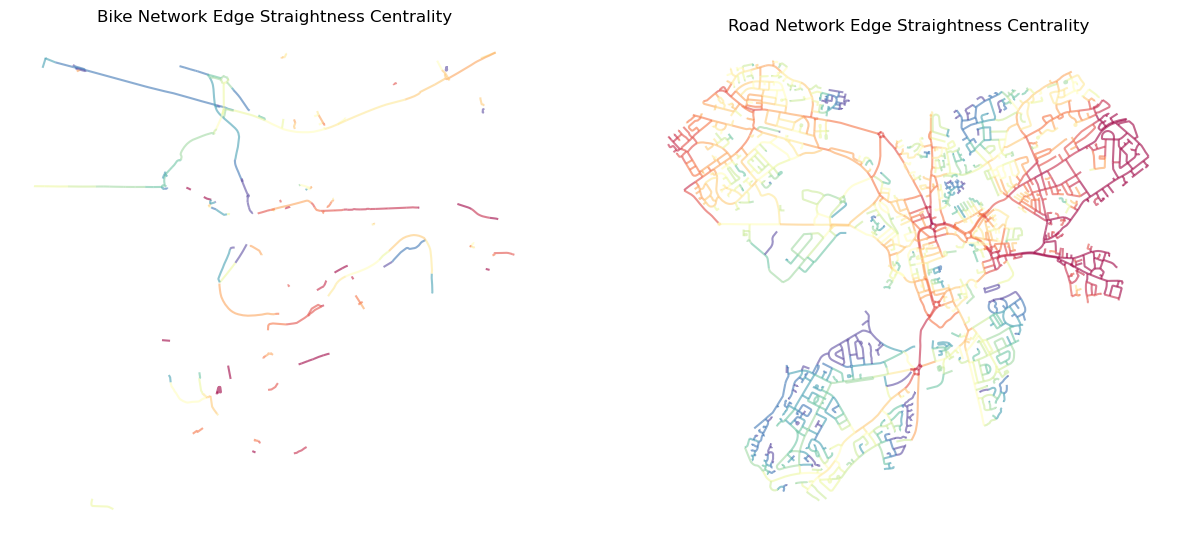

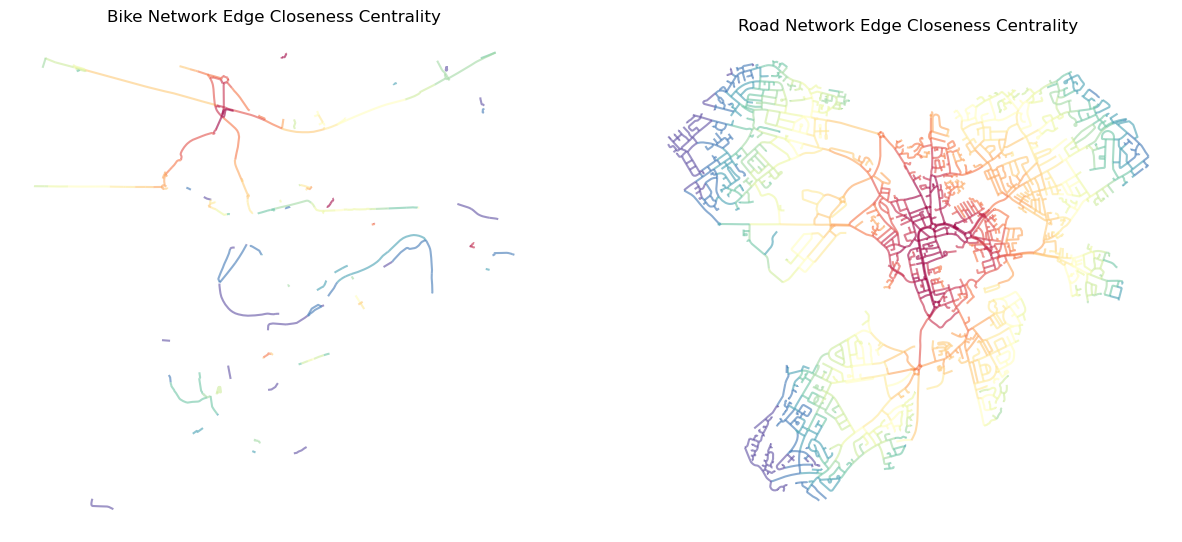

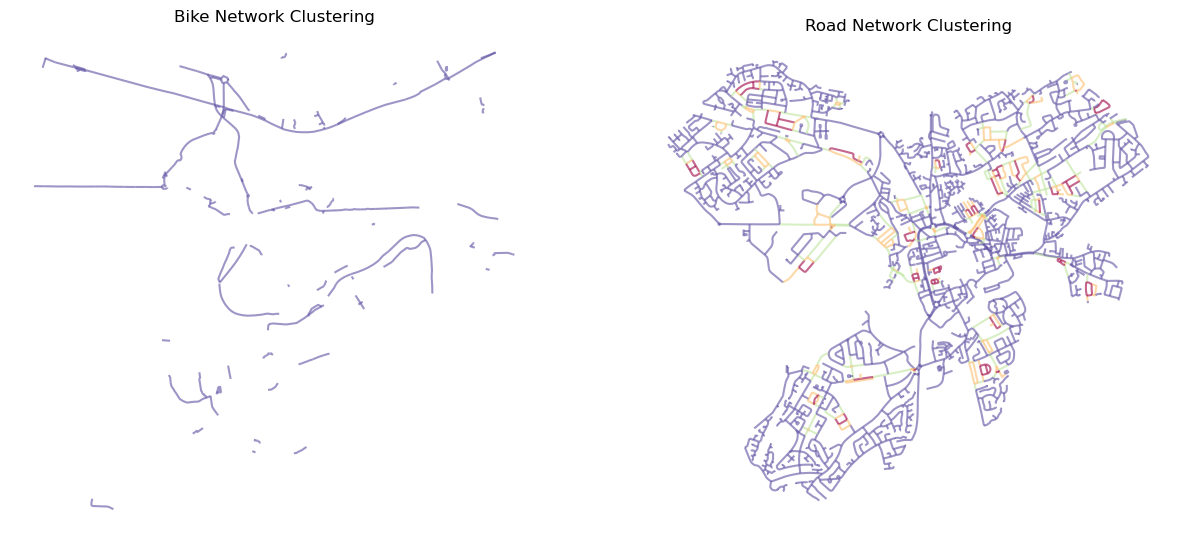

c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\momepy\utils.py:235: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\momepy\utils.py:86: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cent = gdf_network.geometry.centroid
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-packages\momepy\utils.py:235: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length
c:\Users\b8008458\Anaconda3\envs\environment\lib\site-p

In [10]:
# run next notebook
if run_scripts == True:
    %run ./01-bike-network-data-analysis.ipynb